In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [14]:
continous_features=['bmi',"charges","age"]
discrete_categorical=["sex","smoker","region"]
discrete_count=["children"]

**EDA**

In [15]:
#for continous features
df[continous_features].describe()

,bmi,charges,age
count,1338.000000,1338.000000,1338.000000
mean,30.663397,13270.422265,39.207025
std,6.098187,12110.011237,14.049960
min,15.960000,1121.873900,18.000000
25%,26.296250,4740.287150,27.000000
50%,30.400000,9382.033000,39.000000
75%,34.693750,16639.912515,51.000000
max,53.130000,63770.428010,64.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


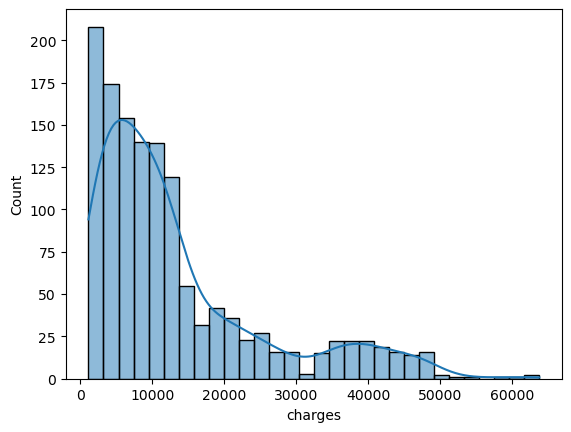

In [16]:
sns.histplot(df["charges"],kde=True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


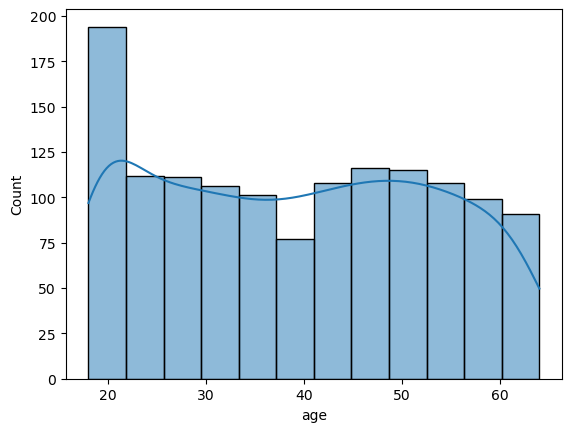

In [17]:
sns.histplot(df["age"],kde=True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


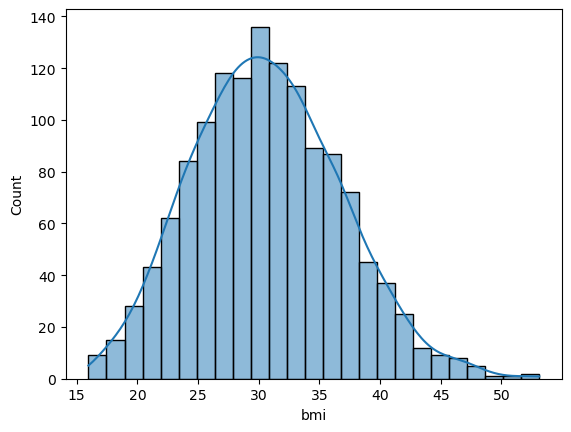

In [18]:
sns.histplot(df["bmi"],kde=True)
plt.show()

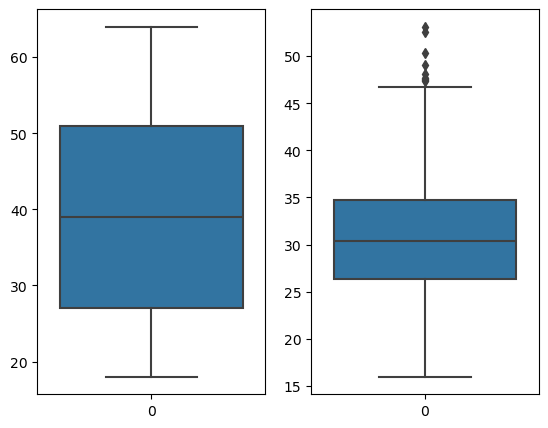

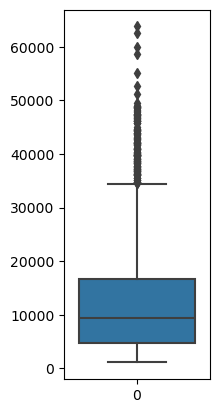

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(df["age"])
plt.subplot(1,3,2)
sns.boxplot(df["bmi"])
plt.show()
plt.subplot(1,3,3)
sns.boxplot(df["charges"])
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

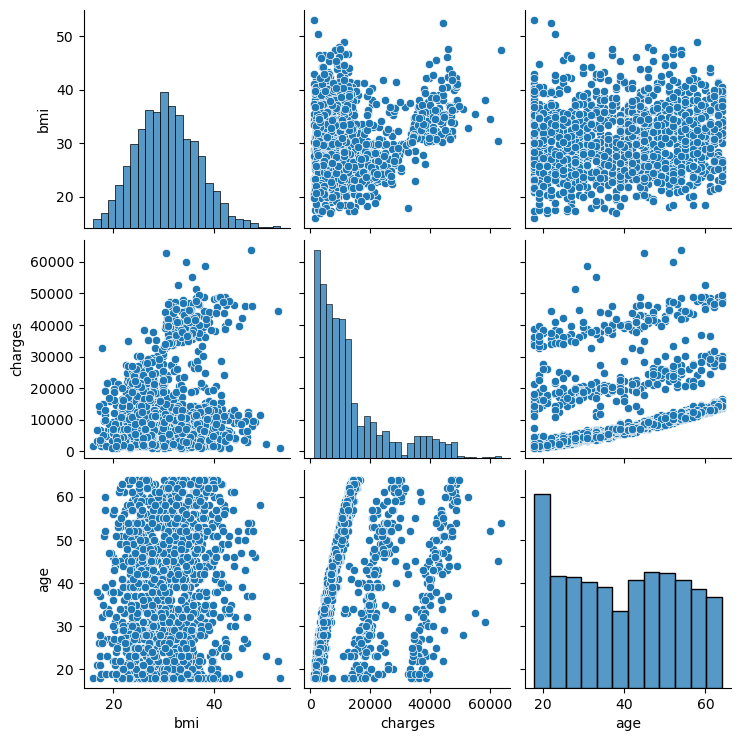

In [20]:
plt.figure(figsize=(10,5))
sns.pairplot(df[continous_features])
plt.show()

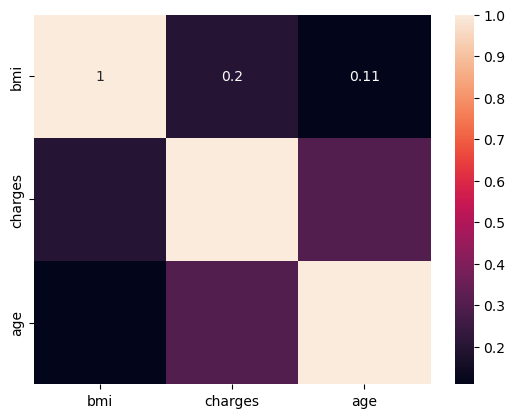

In [21]:
sns.heatmap(df[continous_features].corr(),annot=True)
plt.show()

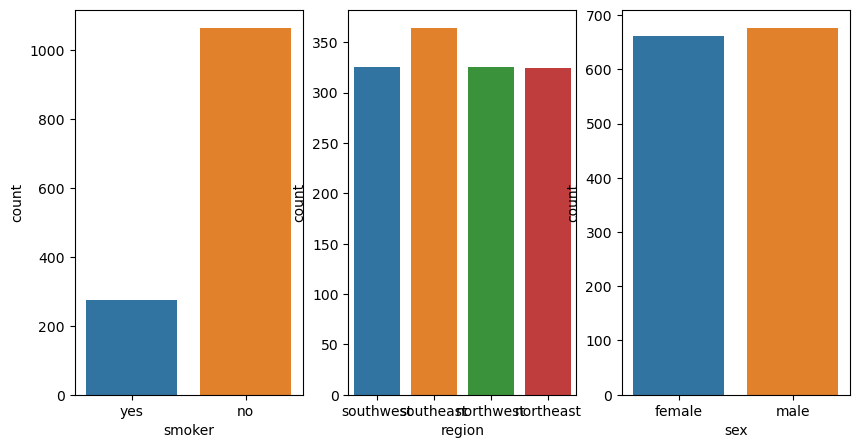

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x="smoker",data=df)
plt.subplot(1,3,2)
sns.countplot(x="region",data=df)
plt.subplot(1,3,3)
sns.countplot(x="sex",data=df)
plt.show()

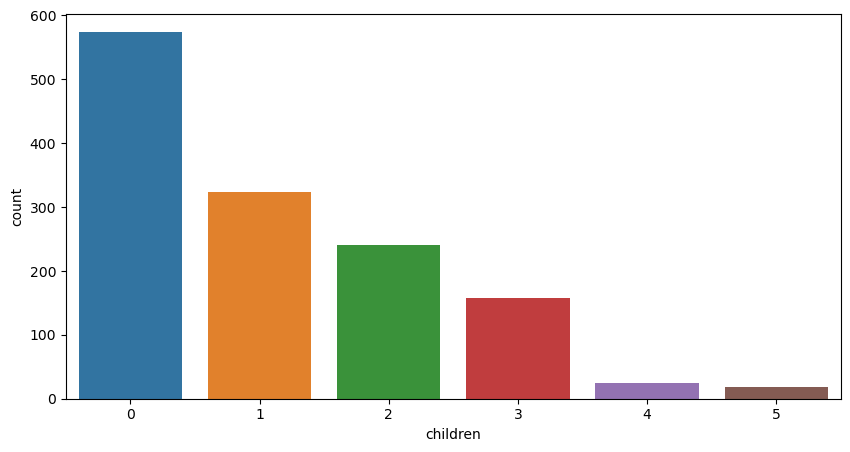

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="children",data=df)
plt.show()

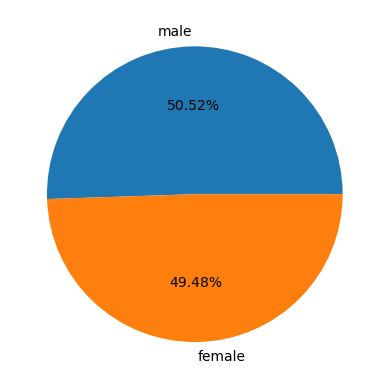

In [24]:
plt.pie(df["sex"].value_counts(),labels=df["sex"].value_counts().index,autopct="%.2f%%")
plt.show()

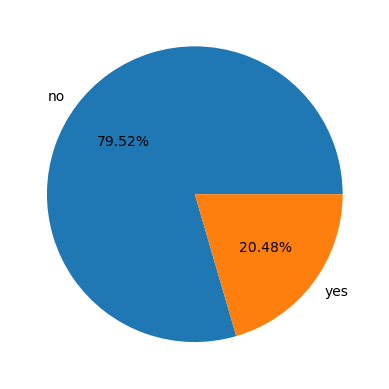

In [25]:
plt.pie(df["smoker"].value_counts(),labels=df["smoker"].value_counts().index,autopct="%.2f%%")
plt.show()

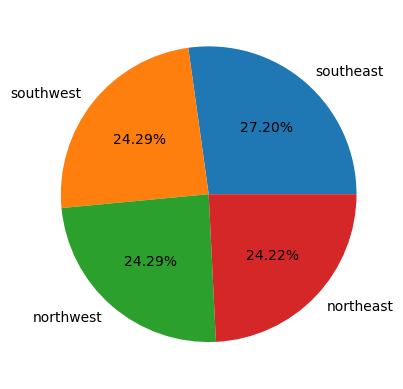

In [26]:
plt.pie(df["region"].value_counts(),labels=df["region"].value_counts().index,autopct="%.2f%%")
plt.show()

In [27]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [28]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [29]:
df.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

**Data Preprocessing**

**wrong data**
**wrong data type**
**duplicates**
**missing values**
## **outliers**

In [30]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [31]:
df.duplicated().sum()

1

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**TRansformation**


**data wrangling**
- encoding
- scaling

In [35]:
df[continous_features].skew()

bmi        0.283914
charges    1.515391
age        0.054781
dtype: float64

In [36]:
from scipy.stats import boxcox
df["charges"]=boxcox(df["charges"])[0]

In [37]:
df["bmi"]=boxcox(df["bmi"])[0]

In [38]:
df[continous_features].skew()

bmi       -0.007155
charges   -0.008674
age        0.054781
dtype: float64

In [39]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,7.882305,0,yes,southwest,12.120634
1,18,male,8.806054,1,no,southeast,8.804026
2,28,male,8.690111,3,no,southeast,10.141549
3,33,male,6.972517,0,no,northwest,12.526076
4,32,male,8.043361,0,no,northwest,9.939887
...,...,...,...,...,...,...,...
1333,50,male,8.377256,3,no,northwest,11.416735
1334,18,female,8.525002,0,no,northeast,9.145579
1335,18,female,9.256115,0,no,southeast,8.725190
1336,21,female,7.526579,0,no,southwest,9.014352


**encoding**

In [40]:
df["sex"]=df["sex"].map({"male":0,"female":1})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df["region"]=df["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,7.882305,0,1,1,12.120634
1,18,0,8.806054,1,0,2,8.804026
2,28,0,8.690111,3,0,2,10.141549
3,33,0,6.972517,0,0,3,12.526076
4,32,0,8.043361,0,0,3,9.939887
...,...,...,...,...,...,...,...
1333,50,0,8.377256,3,0,3,11.416735
1334,18,1,8.525002,0,0,4,9.145579
1335,18,1,9.256115,0,0,2,8.725190
1336,21,1,7.526579,0,0,1,9.014352


In [42]:
df.to_csv("preprocessed_data.csv",index=False)

In [43]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


In [46]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2:",r2)


MSE: 0.34572438411077316
R2: 0.8316655057465088


In [47]:
Ridge_model=Ridge()
Ridge_model.fit(x_train,y_train)
y_pred=Ridge_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2:",r2)

MSE: 0.34636274581708654
R2: 0.8313546850467788


In [48]:
lass_model=Lasso()
lass_model.fit(x_train,y_train)
y_pred=lass_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2:",r2)

MSE: 1.4627675999120509
R2: 0.28777299068759765


In [49]:
elastic_model=ElasticNet()
elastic_model.fit(x_train,y_train)
y_pred=elastic_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2:",r2)

MSE: 1.4524885780627186
R2: 0.2927778848285719


In [50]:
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2:",r2)

MSE: 0.9455982065586483
R2: 0.5395847004616929


In [51]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 0.596431102727368
Root Mean Squared Error: 0.7722895200165337
R2 Score: 0.7095954678091364


In [52]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 0.31537839834309533
Root Mean Squared Error: 0.5615856108761115
R2 Score: 0.8464410795897149


In [53]:
svr_model=SVR()
svr_model.fit(x_train,y_train)
y_pred=svr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 1.4552265553066017
Root Mean Squared Error: 1.2063277147220823
R2 Score: 0.29144475347941334


In [54]:
import pickle
pickle.dump(rf_model,open("rf_model.pkl","wb"))